## Hausarbeit - Aufgabe 1
### 1.Schritt: Einladen der nötigen Bibliotheken und Netzwerke

In [36]:
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import models
from torchvision import transforms

dir(models)

resnet = models.resnet101(pretrained=True)
alexnet = models.alexnet(pretrained=True)

### 2.Schritt: Einladen der Katzenbilder und Durchführung des Preprocessings

In [37]:
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])

# Pfad der Katzenbilder
picture_directory = 'cat_pictures'

# Leere Listen für die Bilder (Original und Prepocessed)
pictures = []
preprocessed_pictures = []

for file in os.listdir(picture_directory):
    # Öffnen der Bilddatei
    picture = Image.open(os.path.join(picture_directory, file))
    # Anhängen der Bilddatei an die Liste "Pictures"
    pictures.append(picture)

    # Durchführung des Preprocessings
    preprocessed_picture = preprocess(picture)
    batch_t = torch.unsqueeze(preprocessed_picture, 0)
    # Anhängen der bearbeiteten Bilder an die Liste "Preprocessed_pictures"
    preprocessed_pictures.append(batch_t)

### 3.Schritt: Evaluierung der Bilderkennung mittels ResNET und AlexNET

In [38]:
### RESNET ###
resnet.eval()

### ALEXNET ###
alexnet.eval()


with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

top5_resNET = []
top5_alexNET = []

for batch_t in preprocessed_pictures:
    out_resNet = resnet(batch_t)
    _, index = torch.max(out_resNet, 1)
    percentage = torch.nn.functional.softmax(out_resNet, dim=1)[0] * 100
    _, indices = torch.sort(out_resNet, descending=True)
    top_5_resNet = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    top5_resNET.append(top_5_resNet)

    out_alexNet = alexnet(batch_t)
    _, index = torch.max(out_alexNet, 1)
    percentage = torch.nn.functional.softmax(out_alexNet, dim=1)[0] * 100
    _, indices = torch.sort(out_alexNet, descending=True)
    top_5_AlexNet = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    top5_alexNET.append(top_5_AlexNet)

### 4.Schritt: Darstellung der Ergebnisse im Subplot

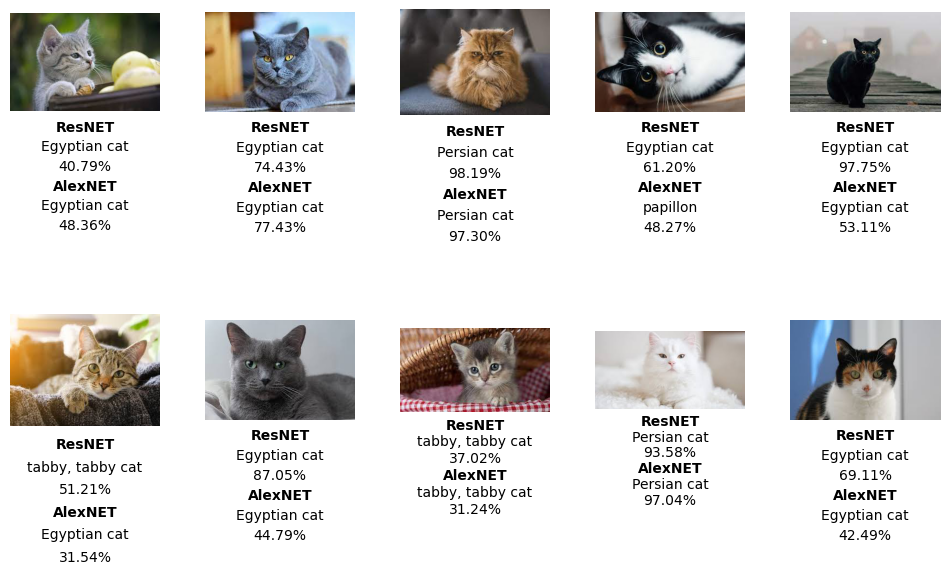

In [39]:
# Definition der Subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))

# Iteration über alle Bilder und Positionierung im Plot
i = 0
while i < len(pictures):
    row = i // 5  # Integer Division - Floor
    col = i % 5   # Modulus Operator - Rest

    # Auslesen der Ergebnisse der Netzwerke 
    # (Wert 1: Label, Wert 2: Genauigkeit)
    label_resNet, Prob_resNet = top5_resNET[i][0]
    label_alexNet, Prob_alexNet = top5_alexNET[i][0]

    # Anpassung der Abstände zwischen den Subplots
    plt.subplots_adjust(wspace=0.3, hspace=0)

    # Darstellen der Bilder
    axs[row, col].imshow(pictures[i])
    axs[row, col].set_axis_off()

    # Angabe des Labels und der Wahrscheinlichkeit unterhalb des entsprechenden Bildes
    ### RESNET ###
    axs[row, col].text(0.5, -0.2, f"ResNET", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=10, weight='bold')
    axs[row, col].text(0.5, -0.4, f"{label_resNet}", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=10)
    axs[row, col].text(0.5, -0.6, f"{Prob_resNet:.2f}%", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=10)
    
    ### ALEXNET ###
    axs[row, col].text(0.5, -0.8, f"AlexNET", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=10, weight='bold')
    axs[row, col].text(0.5, -1, f"{label_alexNet}", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=10)
    axs[row, col].text(0.5, -1.2, f"{Prob_alexNet:.2f}%", 
                        transform=axs[row, col].transAxes, ha='center', fontsize=10)
    i += 1

# Anzeigen des Subplots
plt.show()